In [1]:
# This file aimed to trined on a LSTM based on different power and threshould and
# see if it works.
from DataPrepocessing import *
from NeuralNets import *
from TrainMethod import *

import matplotlib.pyplot as plt
import torch.optim as optim
import torch.nn as nn
from functools import partial


In [2]:
model = SimpleLSTM()

(612, 833)


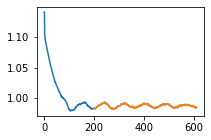

In [3]:
# read the data and only keep the stable state
plt.figure(figsize=(3,2))
raw_data_P1T1 = pd.read_csv("./data/Tracked Files/P1T1.csv")
raw_data_P1T1.fillna(0, inplace= True)
plt.plot(raw_data_P1T1.iloc[:,1])
cut_data_P1T1 = raw_data_P1T1[200:]
plt.plot(cut_data_P1T1.iloc[:,1])
print(raw_data_P1T1.shape)

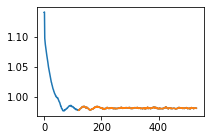

In [4]:
raw_data_P1T09 = pd.read_csv("./data/Tracked Files/P1T0.9.csv")
raw_data_P1T09.fillna(0, inplace= True)
plt.figure(figsize=(3,2))
data = raw_data_P1T09
plt.plot(data.iloc[:,1])
cut_data_P1T09 = data[120:]
plt.plot(cut_data_P1T09.iloc[:,1])

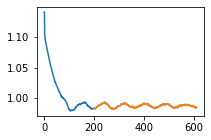

In [5]:
raw_data_P06T1 = pd.read_csv("./data/Tracked Files/P0.6T1.csv")
raw_data_P06T1.fillna(0, inplace= True)
plt.figure(figsize=(3,2))
plt.plot(raw_data_P06T1.iloc[:,1])
cut_data_P06T1 = raw_data_P06T1[200:]
plt.plot(cut_data_P06T1.iloc[:,1])

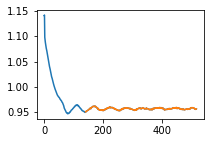

In [6]:
raw_data_P1T11 = pd.read_csv("./data/Tracked Files/P1T1.1.csv")
raw_data_P1T11.fillna(0, inplace= True)
plt.figure(figsize=(3,2))
plt.plot(raw_data_P1T11.iloc[:,1])
cut_data_P1T11 = raw_data_P1T11[140:]
plt.plot(cut_data_P1T11.iloc[:,1])

In [7]:
# now we get all the stable data
print(len(cut_data_P1T1))
print(len(cut_data_P1T11))
print(len(cut_data_P06T1))
print(len(cut_data_P1T09))

# first, cut the data according to the sequence length
sequence_length = 10

time_cut = lambda data : data[: len(data)//sequence_length * sequence_length]

cut_data_P1T11 = time_cut(cut_data_P1T11)
cut_data_P1T1 = time_cut(cut_data_P1T1)
cut_data_P06T1 = time_cut(cut_data_P06T1)
cut_data_P1T09 = time_cut(cut_data_P1T09)

# drop the first timestamp column (OR should we keep it?)

drop_first = lambda data : data.iloc[:, 1:]

cut_data_P1T11 = drop_first(cut_data_P1T11)
cut_data_P1T1 = drop_first(cut_data_P1T1)
cut_data_P06T1 = drop_first(cut_data_P06T1)
cut_data_P1T09 = drop_first(cut_data_P1T09)




print(len(cut_data_P1T1))
print(len(cut_data_P1T11))
print(len(cut_data_P06T1))
print(len(cut_data_P1T09))

412
376
412
413
410
370
410
410


In [8]:
# this function move the keff from the first column to the last
def move_labels(df):
    # move the first column to the last column
    cols = list(df.columns)
    # df = df.iloc[:, 1:] # select all rows and columns except the first one
    df[cols[0]] = df.pop(cols[0]) # remove the first column and append it to the end
    return df


In [9]:
def add_Power_and_Threshold(df, p = 1, t =1):
    df['P'] = p
    df['t'] = t

    return df

In [10]:
cut_data_P1T11 = add_Power_and_Threshold(cut_data_P1T11,1,1.1)
cut_data_P1T1 = add_Power_and_Threshold(cut_data_P1T1,1,1)
cut_data_P06T1 = add_Power_and_Threshold(cut_data_P06T1,0.6,1)
cut_data_P1T09 = add_Power_and_Threshold(cut_data_P1T09,1,0.9)

In [23]:
print(cut_data_P06T1.shape)
print(cut_data_P1T1.shape)
print(cut_data_P1T09.shape)
print(cut_data_P1T11.shape)

(410, 834)
(410, 834)
(410, 837)
(370, 824)


In [11]:
# question: how to deal with non-fule pebbles?
# question: how to deal with NAN values i.e. different sample number each time stamp

all_data = pd.concat([cut_data_P1T1, cut_data_P1T11, cut_data_P06T1, cut_data_P1T09], ignore_index= True)
all_data.fillna(0, inplace= True)
all_data = move_labels(all_data)
print(all_data.shape)

(1600, 837)


C:\Users\86182\AppData\Local\Temp\ipykernel_13428\3494102704.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[cols[0]] = df.pop(cols[0]) # remove the first column and append it to the end


In [12]:
# do the data preprossing
data = all_data.to_numpy()

data = generate_histogram(data)

data = standarlize(data)


clean_data = data.copy()


In [13]:
data.shape

(1600, 151)

In [14]:
all_data.columns

Index(['keff_relative_uncertainty [/]', 'Cs137_0 [at/b.cm]',
       'Cs137_1 [at/b.cm]', 'Cs137_2 [at/b.cm]', 'Cs137_3 [at/b.cm]',
       'Cs137_4 [at/b.cm]', 'Cs137_5 [at/b.cm]', 'Cs137_6 [at/b.cm]',
       'Cs137_7 [at/b.cm]', 'Cs137_8 [at/b.cm]',
       ...
       'Cs137_826 [at/b.cm]', 'Cs137_827 [at/b.cm]', 'Cs137_828 [at/b.cm]',
       'Cs137_829 [at/b.cm]', 'P', 't', 'Cs137_830 [at/b.cm]',
       'Cs137_831 [at/b.cm]', 'Cs137_832 [at/b.cm]', 'keff [/]'],
      dtype='object', length=837)

In [15]:
training_data = ReactorData(data,10,0,0.75)
testing_data = ReactorData(data,10,0.75,1)

In [16]:
# define neural nets

input_dim = training_data[0][0].shape[1]



# print(output_dim)

# some adjustable hyper-parameters
nets_hyper_parameters = {
'input_dim' : input_dim,
'output_dim' : 1,
'hidden_dim' : 64,
'lstm_nums_layer' : 2,
'dropout' : 0.2 
}


model = SimpleLSTM(**nets_hyper_parameters)

In [17]:
optimizer_parameters = {
    'params':model.parameters(),
    'lr' : 0.01,
    'weight_decay' : 0.01
}

train_parameters = {
    'model' : model,
    'training_data' : training_data,
    'epoch_num': 400,
    'batch_size':16,
    'optimizer' : optim.Adam(**optimizer_parameters),
    'loss_fn' : nn.MSELoss(),
    'print_out_frequency': 20

}


model, _ = train(** train_parameters)

The loss is 1.0280465348068706 in epoch 0
The loss is 0.06146005049411337 in epoch 20
The loss is 0.057992978742679856 in epoch 40
The loss is 0.11512621154144018 in epoch 60
The loss is 0.14086350442772055 in epoch 80
The loss is 0.05163912257959489 in epoch 100
The loss is 0.1371284477148021 in epoch 120
The loss is 0.06101642308413937 in epoch 140
The loss is 0.042196547479542 in epoch 160
The loss is 0.2116671171953742 in epoch 180
The loss is 0.3663706951644625 in epoch 200
The loss is 0.030602629052894997 in epoch 220
The loss is 0.06554319328081479 in epoch 240
The loss is 0.059417124587252415 in epoch 260
The loss is 0.07254515046334724 in epoch 280
The loss is 0.0426268023991292 in epoch 300
The loss is 0.029287986397220293 in epoch 320
The loss is 0.0474808577685555 in epoch 340
The loss is 0.03435441010299244 in epoch 360
The loss is 0.054485357004821613 in epoch 380
Training is finished, the final loss is 0.03715142852948442


In [18]:
# visualize the training output
def show(data, model):
    import matplotlib.pyplot as plt


    X = (torch.tensor(data.unshaped_data)).double()
    y = (torch.tensor(data.unshaped_labels)).double()


    plt.figure()
    plt.plot(y, label = "Real")     
    plt.plot(model(X).detach().numpy(), label = "Predict")
    plt.legend()


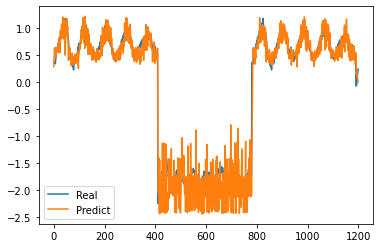

In [19]:
show(training_data, model)

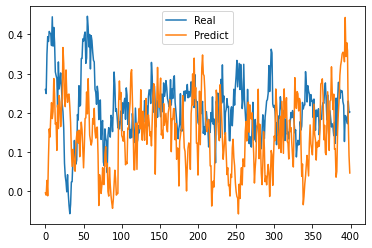

In [20]:
show(testing_data, model)


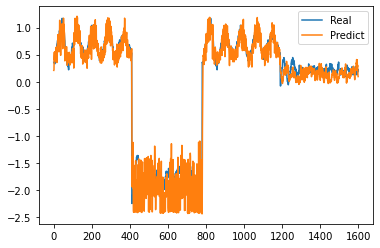

In [21]:
# view all data together
import matplotlib.pyplot as plt


X = (torch.tensor(data[:,:-1])).double()
y = (torch.tensor(data[:,-1:])).double()


plt.figure()
plt.plot(y, label = "Real")     
plt.plot(model(X).detach().numpy(), label = "Predict")
plt.legend()